In [ ]:
#CSI5810-HW4
#by: Gregory Sylvester
#31-10-2023

#imports and libraries
import numpy as np
import sklearn as skl
from sklearn import cluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from sklearn import model_selection
import io
import math
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#file directory for stored files
from google.colab import drive
drive.mount('/content/drive')

def cl():
  return " "

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#export file to html then pdf
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/CSI5810-HW4.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CSI5810-HW4.ipynb to html
[NbConvertApp] Writing 815364 bytes to /content/drive/MyDrive/Colab Notebooks/CSI5810-HW4.html


#**Problem 1**
----------
In this exercise, you will perform k-means clustering on the seed data at the following link:
https://archive.ics.uci.edu/ml/datasets/seeds
You will perform clustering using the following values of k: 2, 3, 4, and 5. In each case you will determine the SSE value and calculate the value of Rand index and tabulate your results.

In [ ]:
#simplified call to kMeans from sklLearn cluster Kmeans
def kMeansModel(k, input_matrix):
  model = skl.cluster.KMeans(k).fit(input_matrix)
  print(f"The SSE for the model with {model.n_clusters} centroids: {model.inertia_}")
  return model

#standardize data before moving on
#last column is assumed to be the class lables 1-3
def standData(input_matrix):
  return preprocessing.StandardScaler().fit(input_matrix).transform(input_matrix)

def randInd(input_matrix, kMModel):
  pred_labels = kMModel.labels_
  #score = metrics.rand_score(pred_labels, input_matrix)
  top = 0

  score = metrics.rand_score(pred_labels, input_matrix)
  # doesn't work top / math.comb(pred_labels.shape[0], 2)
  print(f"The randIndex score of the model {kMModel.n_clusters} with the true data is: {score}")
  return score


In [ ]:
#import the data from google drive also clean data
file = open('/content/drive/My Drive/HW Files/CSI5810/HW4/seeds_dataset.txt','r')
data = file.read().replace("\t", ", ").replace(", , " or ", , , ",", ")
data_matrix = np.genfromtxt(io.StringIO(data), delimiter=',')
print(data_matrix)
file.close()

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]


In [ ]:
stand_matrix = standData(data_matrix[:,:-1])
std_data_matrix = stand_matrix[:,:-1]
std_class_matrix = data_matrix[:,-1:].flatten()

kmm_2 = kMeansModel(2,std_data_matrix)
kmm_3 = kMeansModel(3,std_data_matrix)
kmm_4 = kMeansModel(4,std_data_matrix)
kmm_5 = kMeansModel(5,std_data_matrix)

randInd(std_class_matrix, kmm_2)
randInd(std_class_matrix, kmm_3)
randInd(std_class_matrix, kmm_4)
randInd(std_class_matrix, kmm_5)

cl()

The SSE for the model with 2 centroids: 589.3502786941817
The SSE for the model with 3 centroids: 381.9216304029188
The SSE for the model with 4 centroids: 332.0484211069703
The SSE for the model with 5 centroids: 292.0384473245262
The randIndex score of the model 2 with the true data is: 0.7254499886078833
The randIndex score of the model 3 with the true data is: 0.8725905673274095
The randIndex score of the model 4 with the true data is: 0.8426976532239691
The randIndex score of the model 5 with the true data is: 0.8140806561859193


' '

#**Problem 2**
-----
You will perform this exercise using the PCA-Exercise data posted on the course page.

Suppose we are interested in reducing the six-dimensional records to two dimensions by means of principal component analysis. List the eigenvalues and eigenvectors obtained via PCA. Determine the reduced representation for all the records and plot the reduced representation in the form of a scatter plot. Reconstruct the original data and compute the reconstruction error.


In [ ]:
#import the data from greg's drive (if you try to run this the file path needs to be changed)
df = pd.read_excel('/content/drive/My Drive/HW Files/CSI5810/HW4/PCAExerciseData.xlsx')

#dump the dataframe to a numpy array
data = df.to_numpy()
print(" ")

x_set = data[:,:-1]
y_set = data[:,-1:]
ab_set_index = np.array(np.where(y_set[:] == "AB"))[0,:]
no_set_index = np.array(np.where(y_set[:] != "AB"))[0,:]
print(no_set_index)
pca = decomposition.PCA(2)

 
[210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309]


eigenvectors:  [[ 0.32363623  0.11318555  0.30367075  0.21045228 -0.02996484  0.86315969]
 [-0.47663818 -0.09856923 -0.53278044 -0.37805365  0.32184821  0.48242546]] 

 eigen values:  [1780.96175177  345.32313668]


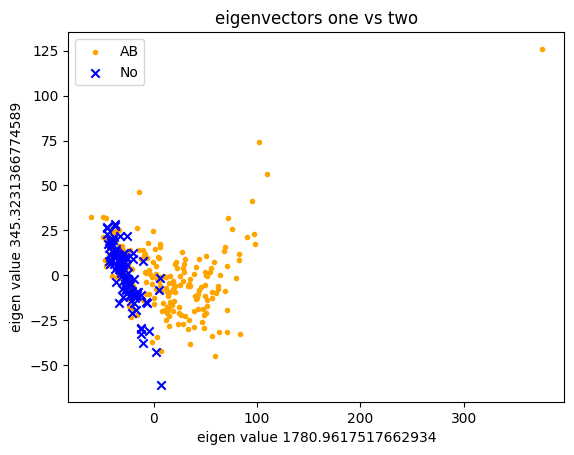

In [ ]:
reduced_x_set = pca.fit_transform(x_set)
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

print("eigenvectors: ",eigenvectors, "\n\n eigen values: ", eigenvalues)

plt.scatter(reduced_x_set[ab_set_index,0],reduced_x_set[ab_set_index,1],color="orange",marker=".",label="AB")
plt.scatter(reduced_x_set[no_set_index,0],reduced_x_set[no_set_index,1],color="blue",marker="x",label="No")
plt.title("eigenvectors one vs two")
plt.xlabel(f"eigen value {eigenvalues[0]}")
plt.ylabel(f"eigen value {eigenvalues[1]}")
plt.legend()
plt.show()

In [ ]:
reconstructed = pca.inverse_transform(reduced_x_set)

mse = metrics.mean_squared_error(x_set, reconstructed)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 63.69433233345993


#**Problem 3**
----------
In this exercise, you will be using the Spoken Arabic Digit Dataset at the following link:
	 https://archive.ics.uci.edu/ml/datasets/Spoken+Arabic+Digit
You will perform the following tasks on this data:

a. Apply k-means clustering to determine a suitable number of clusters

b. Perform t-SNE visualization of the data

c. Perform MDS

Note: Class labels are not needed for above tasks.


In [ ]:
#import the data from greg's drive (if you try to run this the file path needs to be changed)
df = pd.read_csv('/content/drive/My Drive/HW Files/CSI5810/HW4/Train_Arabic_Digit.txt', delimiter=" ",skip_blank_lines=True)

#dump the dataframe to a numpy array
train = df.dropna().to_numpy()

#import the data from greg's drive (if you try to run this the file path needs to be changed)
df = pd.read_csv('/content/drive/My Drive/HW Files/CSI5810/HW4/Test_Arabic_Digit.txt', delimiter=" ",skip_blank_lines=True)

#dump the dataframe to a numpy array
test = df.dropna().to_numpy()

print(test.shape,train.shape)

(87063, 13) (263256, 13)


In [ ]:
#a, perform k-means clustering
k_means = cluster.KMeans(n_clusters = 10).fit(train)

print(test.shape,train.shape)

(87063, 13) (263256, 13)


In [ ]:
test_predict = k_means.predict(test)


In [ ]:
#B
x_1, test_subset, y_1, test_predict_subset = model_selection.train_test_split(test, test_predict, test_size=0.05, random_state=22)
TSNE = manifold.TSNE(n_components=2,random_state=22,n_iter=300,perplexity=20,angle=.25)
TSNE.fit(test_subset,test_predict_subset)
x_tsne = TSNE.fit_transform(test)


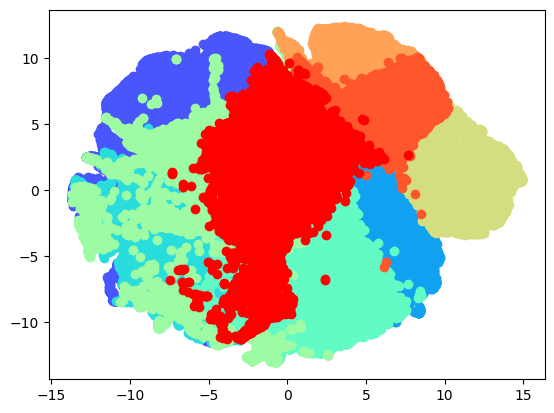

In [ ]:
unique_labels = set(test_predict)

colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    indices = test_predict == label
    plt.scatter(x_tsne[indices, 0], x_tsne[indices, 1], c=[colors[i]])
plt.show()

In [ ]:
mds = manifold.MDS()
out = mds.fit_transform(test_subset,test_predict_subset)

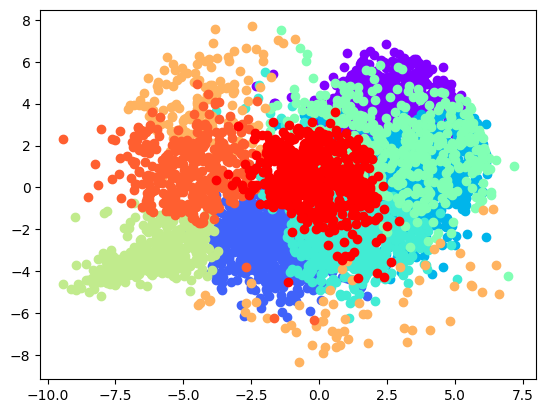

In [ ]:
unique_labels = set(test_predict_subset)

colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    indices = test_predict_subset == label
    plt.scatter(out[indices, 0], out[indices, 1], c=[colors[i]])
plt.show()